# MNIST dataset classification using Keras

In [0]:
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np

import matplotlib.pyplot as plt

## Set some parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows = 28
img_cols = 28 

# Get MNIST dataset

In [0]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
print('X_train shape: {}, Y_train shape: {}'.format(x_train.shape,y_train.shape))
print('X_test shape: {}, Y_test shape: {}'.format(x_test.shape,y_test.shape))

X_train shape: (60000, 28, 28, 1), Y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1), Y_test shape: (10000,)


# Preprocess image data

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print('X_train shape: {}, Y_train shape: {}'.format(x_train.shape,y_train.shape))
print('X_test shape: {}, Y_test shape: {}'.format(x_test.shape,y_test.shape))

X_train shape: (60000, 28, 28, 1), Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1), Y_test shape: (10000, 10)


# Build a CNN based deep neural network

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=num_classes,activation='softmax'))

# Visualize the network architecture

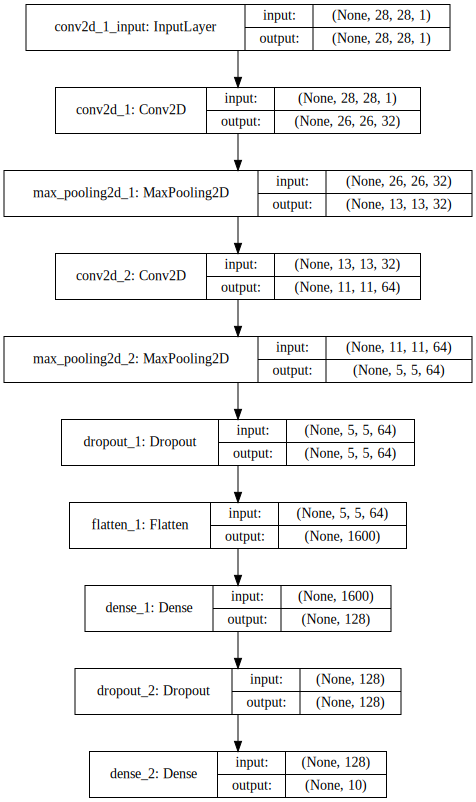

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

# Compile the model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

# Train the classifier

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.2193 - acc: 0.9331 - val_loss: 0.0546 - val_acc: 0.9829
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.1195 - acc: 0.9654 - val_loss: 0.0449 - val_acc: 0.9848
Epoch 3/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.1100 - acc: 0.9684 - val_loss: 0.0372 - val_acc: 0.9885
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.1105 - acc: 0.9688 - val_loss: 0.0442 - val_acc: 0.9859
Epoch 5/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0958 - acc: 0.9729 - val_loss: 0.0349 - val_acc: 0.9900


# Predict and test model performance

In [13]:
score  =  model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 96us/step


In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03491694972767909
Test accuracy: 0.99


# How CNN Classifies an Image? 

In [0]:
test_image =np.expand_dims(x_test[4], axis=3)
test_image = test_image.reshape(1,img_rows, img_cols,1)

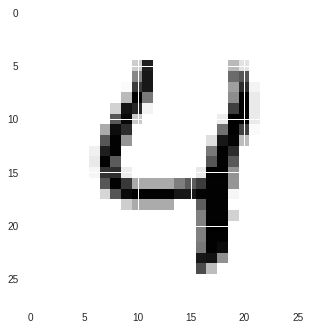

In [18]:
plt.imshow(x_test[4][:,:,0], cmap=plt.get_cmap('binary'))

In [19]:
y_test[4]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
model.predict_classes(test_image,batch_size=1)

array([4])

## Utility Methods to understand CNN
+ source: https://github.com/fchollet/keras/issues/431
+ source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py

In [0]:
# https://github.com/fchollet/keras/issues/431
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 26, 26, 32)
    (1, 24, 24, 64)
    (1, 12, 12, 64)
    (1, 12, 12, 64)
    (1, 9216)
    (1, 128)
    (1, 128)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [23]:
activations = get_activations(model, test_image)

----- activations -----
(1, 26, 26, 32)
(1, 13, 13, 32)
(1, 11, 11, 64)
(1, 5, 5, 64)
(1, 5, 5, 64)
(1, 1600)
(1, 128)
(1, 128)
(1, 10)


Displaying activation map 0


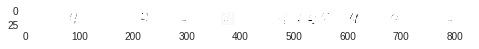

Displaying activation map 1


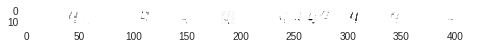

Displaying activation map 2


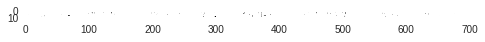

Displaying activation map 3


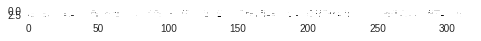

Displaying activation map 4


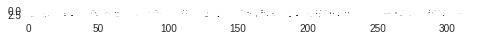

Displaying activation map 5


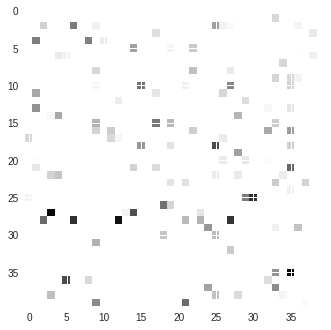

Displaying activation map 6


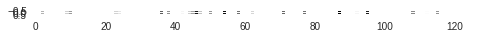

Displaying activation map 7


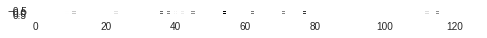

Displaying activation map 8


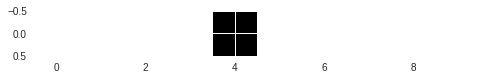

In [24]:
display_activations(activations)